# Telecom Network Traffic Forecast using Exponential Smoothing

### Problem Statement

 The dataset contains the monthly percentage of visitors using international roaming services in Singapore. The objective is to forecast future international roaming usage percentages to help telecom companies better understand trends and optimize network resources, marketing strategies, and infrastructure planning. This will help improve customer experience and enhance revenue streams by identifying potential peak periods for international roaming.


#### Task Overview

In this lab, we will perform the following tasks to forecast the percentage of visitors using international roaming services in Singapore using Exponential Smoothing methods:

1. **Introduction to Exponential Smoothing**:
    - Understand the basics of Exponential Smoothing and its variations: Simple Exponential Smoothing, Holt’s Linear Trend Model, and Holt-Winters Seasonal Model.

2. **Data Exploration**:
    - Load and explore the dataset containing monthly data points from 1991 onward.
    - Perform initial data exploration to understand the structure and characteristics of the data.

3. **Data Preprocessing**:
    - Convert the 'ds' column to datetime format and set it as the index.
    - Check for missing values and summarize the dataset.

4. **Exploratory Data Analysis (EDA)**:
    - Plot the time series data to visualize trends and patterns.
    - Decompose the time series to analyze its components (trend, seasonality, and residuals).
    - Plot Autocorrelation and Partial Autocorrelation functions to understand the temporal dependencies.

5. **Train-Test Split**:
    - Split the dataset into training and testing sets for model evaluation.

6. **Simple Exponential Smoothing**:
    - Build and fit a Simple Exponential Smoothing model.
    - Forecast future values and evaluate the model using RMSE.
    - Plot the forecasted values against the actual values.

7. **Holt’s Linear Trend Model**:
    - Build and fit Holt’s Linear Trend Model to capture the trend in the data.
    - Forecast future values and evaluate the model using RMSE.
    - Plot the forecasted values against the actual values.

8. **Holt-Winters Seasonal Model**:
    - Build and fit the Holt-Winters Seasonal Model to capture both trend and seasonality.
    - Forecast future values and evaluate the model using RMSE.
    - Plot the forecasted values against the actual values.

9. **Model Optimization**:
    - Perform Grid Search to find the best parameters for the Holt-Winters Seasonal Model.
    - Fit the model with the best parameters and evaluate its performance.
    - Plot the forecasted values against the actual values for the optimized model.

10. **Insights and Conclusion**:
     - Summarize the insights gained from the analysis and model performance.
     - Discuss the effectiveness of the Exponential Smoothing methods in forecasting the given time series data.

By the end of this lab, you will have a comprehensive understanding of how to apply Exponential Smoothing methods for time series forecasting and evaluate their performance.




### Data Description

 The dataset is a time series with monthly data points from 1991 onward, capturing the percentage of visitors using international roaming in Singapore.
 It has the following columns:
 - `ds`: Timestamp indicating the month and year of the observation.
 - `y`: Percentage of visitors using international roaming services during the given month.

#### Data Dictionary

 | Column | Description                                     |
 |--------|-------------------------------------------------|
 | ds     | Date (YYYY-MM-DD) representing the observation period. |
 | y      | Percentage of visitors using international roaming in Singapore. |

## Understanding Exponential Smoothing

Exponential Smoothing is a time series forecasting method for univariate data that can be extended to support data with a systematic trend or seasonal component. It is a rule of thumb technique for smoothing time series data, particularly for recursively applying as many as three smoothing equations:

1. **Simple Exponential Smoothing**: Suitable for forecasting data with no clear trend or seasonal pattern. It uses a weighted average of past observations, with the weights decaying exponentially as the observations get older.

2. **Holt’s Linear Trend Model**: Extends simple exponential smoothing to capture linear trends in the data. It involves a forecast equation and two smoothing equations, one for the level and one for the trend.

3. **Holt-Winters Seasonal Model**: Further extends Holt’s method to capture seasonality. It includes three smoothing equations for the level, trend, and seasonal components.

### Key Concepts

- **Smoothing Parameter (α)**: Controls the rate at which the influence of the observations at prior time steps decay exponentially. The value of α ranges between 0 and 1.
- **Level (ℓ)**: The smoothed value at time t.
- **Trend (b)**: The estimated trend at time t.
- **Seasonal Component (s)**: The estimated seasonal component at time t.

### Equations

1. **Simple Exponential Smoothing**:

      $$\hat{y}_{t+1|t} = \alpha y_t + (1 - \alpha) \hat{y}_{t|t-1}$$

2. **Holt’s Linear Trend Model**:

     $$\hat{y}_{t+h|t} = \ell_t + hb_t$$
      $$\ell_t = \alpha y_t + (1 - \alpha)(\ell_{t-1} + b_{t-1})$$
      $$\beta_t = \beta (\ell_t - \ell_{t-1}) + (1 - \beta) b_{t-1}$$


    
3. **Holt-Winters Seasonal Model**:
    - **Additive**:
      \[
      \begin{align*}
      \hat{y}_{t+h|t} &= \ell_t + hb_t + s_{t-m+h_m^+} \\
      \ell_t &= \alpha (y_t - s_{t-m}) + (1 - \alpha)(\ell_{t-1} + b_{t-1}) \\
      b_t &= \beta (\ell_t - \ell_{t-1}) + (1 - \beta) b_{t-1} \\
      s_t &= \gamma (y_t - \ell_{t-1} - b_{t-1}) + (1 - \gamma) s_{t-m}
      \end{align*}
      \]
    - **Multiplicative**:
      \[
      \begin{align*}
      \hat{y}_{t+h|t} &= (\ell_t + hb_t) s_{t-m+h_m^+} \\
      \ell_t &= \alpha \frac{y_t}{s_{t-m}} + (1 - \alpha)(\ell_{t-1} + b_{t-1}) \\
      b_t &= \beta (\ell_t - \ell_{t-1}) + (1 - \beta) b_{t-1} \\
      s_t &= \gamma \frac{y_t}{\ell_{t-1} + b_{t-1}} + (1 - \gamma) s_{t-m}
      \end{align*}
      \]

### Applications

Exponential Smoothing methods are widely used in various domains such as:

- **Finance**: Stock price prediction, risk management.
- **Economics**: GDP forecasting, unemployment rate prediction.
- **Supply Chain Management**: Inventory control, demand forecasting.
- **Weather Forecasting**: Temperature and precipitation prediction.

By adjusting the smoothing parameters, these methods can be tailored to fit different types of time series data, making them versatile tools for forecasting.


## 1. Data Exploration

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import datetime
import warnings
sns.set_theme()
warnings.filterwarnings("ignore")


C:\Users\Anshu Pandey\AppData\Roaming\Python\Python310\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
# Load the Dataset
df = pd.read_csv('datasets/InternationRoaming_singapore.csv')
df.shape

(204, 2)

In [3]:
# Convert the 'ds' column to datetime format
df['ds'] = pd.to_datetime(df['ds'])

# Set 'ds' as the index
df.set_index('ds', inplace=True)

# Display the first few rows of the dataset
df.head()

,y
ds,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


### Exploratory Data Analytics

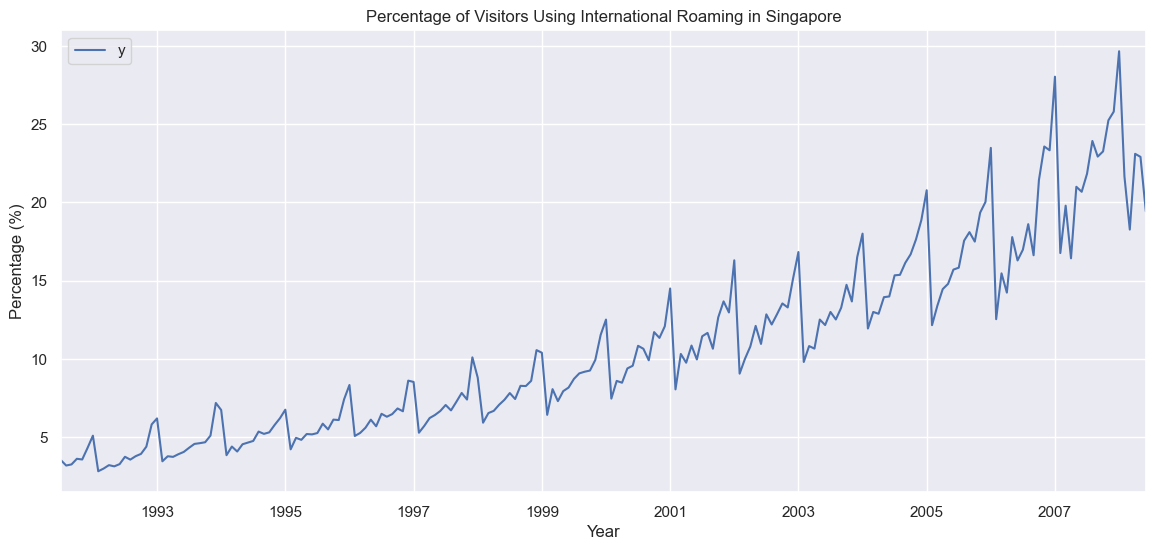

In [4]:
# 1. Plotting the Time Series
df.plot(figsize=(14, 6))
plt.title('Percentage of Visitors Using International Roaming in Singapore')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.show()

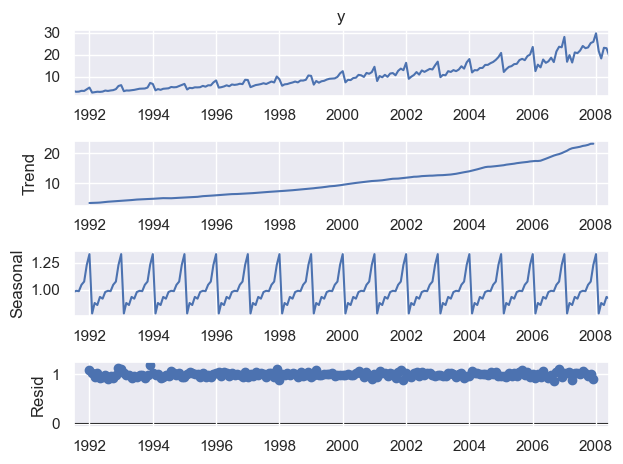

In [5]:
# 2. Decomposing the Time Series
result = seasonal_decompose(df['y'], model='multiplicative', period=12)
result.plot()
plt.show()

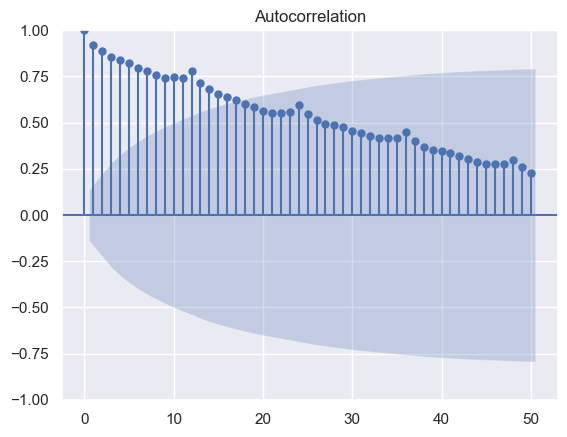

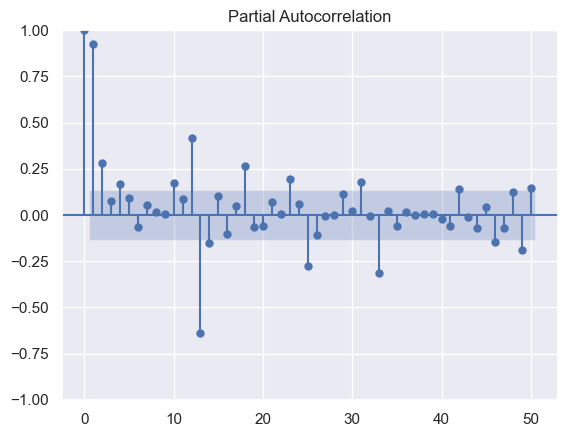

In [6]:
# 3. Autocorrelation and Partial Autocorrelation Plots
plot_acf(df['y'], lags=50)
plt.show()

plot_pacf(df['y'], lags=50)
plt.show()


In [7]:
# Check for Missing Values
print("Missing Values:")
print(df.isna().sum())


Missing Values:
y    0
dtype: int64


In [8]:
# Summary Statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
                y
count  204.000000
mean    10.694430
std      5.956998
min      2.814520
25%      5.844095
50%      9.319345
75%     14.289964
max     29.665356


## Split the data into train and test
- We will use simple train and test split here to make the process simple. In reality, it is better to perform Cross-Validation if you have enough compute power

In [9]:
x_train = df[df.index <datetime.datetime(2005, 1, 1, 0, 0, 0)]
x_test = df[df.index >=datetime.datetime(2005, 1, 1, 0, 0, 0)]
print(x_train.shape, x_test.shape)

(162, 1) (42, 1)


## White Noise
- A time series is white noise if the variables are independent and identically distributed with a mean of zero. 
- All variables have same variance and each value has a zero correlation with all other values in the series.
- If the variables in the series are drawn from a Gaussian distribution, the series is called Gaussian white noise.

### Is your Time Series White noise?
Your time series is not white noise if any of the following conditions are true:
- Does your series have a zero mean?
- Does the variance change over time?
- Do values correlate with lag values?

### What to do?
- Check the mean and variance over a period of time by taking different intervals
- create a correlogram and check for any autocorrelation with lag variables

## Random Walk
How do you know your time series problem is predictable?

Is your time series a random walk?
- The time series shows a strong temporal dependence that decays linearly or in a similar pattern.
- The time series is non-stationary and making it stationary shows no obviously learnable structure in the data.
    - Draw a correllogram of Auto-correlations. check if there is any correlation with the lag variable
    - Make the data stationary(Discussed later) and check if there is any correlation with the lag variable. if the point one has and the point two doesn't them your data is random walk

- The persistence model provides the best source of reliable predictions. (if your baseline models (Naive forecast) are performing well compared to all the models u build, you are dealing with random walk


## Simple Exponential Smoothing 

- The simplest of the exponentially smoothing methods is naturally called “simple exponential smoothing”.
- This method is suitable for forecasting data with no clear trend or seasonal pattern but can fit into some kind of non-linear function.
- often works better than simple moving averages.
- Can be used for stock predictions 

\begin{equation*}
F_{t+1} = \alpha * F_{t}  + \alpha * (1 - \alpha) * F_{t-1} + \alpha * (1 - \alpha)^2 * F_{t-2} + .....N
\end{equation*}

Here $\alpha$ and n are two hyper-parameter which needs to be tuned using the validation set 

In [31]:
# Model Building - Simple Exponential Smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# Fit the Model
model = SimpleExpSmoothing(x_train)
model_fit = model.fit(smoothing_level=0.2)

# Forecasting
y_pred = model_fit.forecast(len(x_test))

rmse = np.sqrt(mean_squared_error(x_test, y_pred))
print(f'RMSE: {rmse}')

RMSE: 5.240110609310516


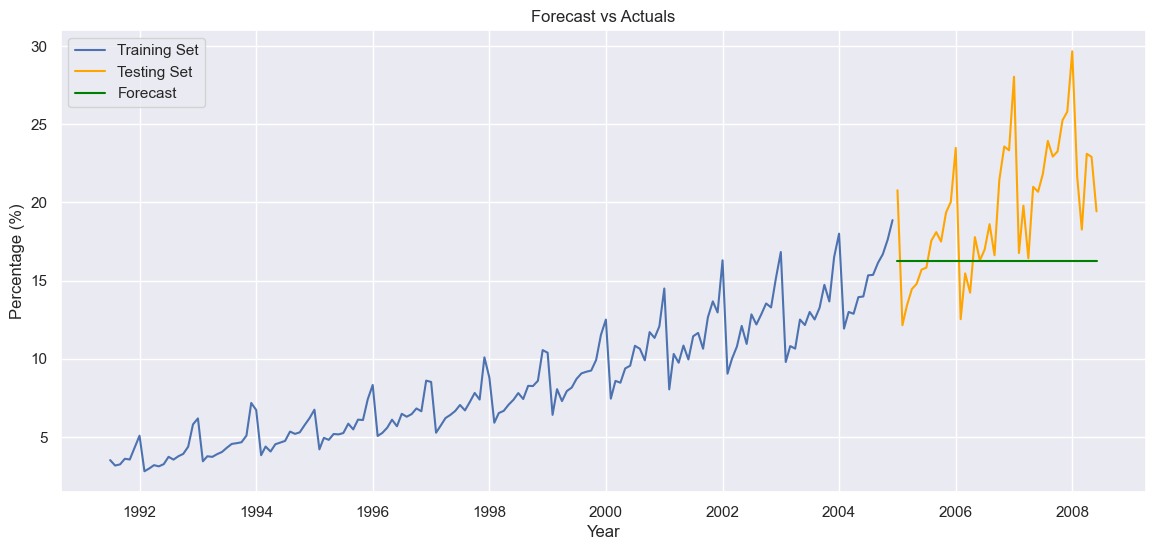

In [32]:
# Plotting Forecast vs Actual
plt.figure(figsize=(14, 6))
plt.plot(x_train.index, x_train, label='Training Set')
plt.plot(x_test.index, x_test, label='Testing Set', color='orange')
plt.plot(x_test.index, y_pred, label='Forecast', color='green')
plt.title('Forecast vs Actuals')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend()
plt.show()

In [28]:
from sklearn.metrics import make_scorer

# Define the parameter grid
param_grid = {
    'smoothing_level': [0.1, 0.2, 0.5, 0.8, 0.9]
}

# Define a custom scorer
def rmse_scorer(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scorer = make_scorer(rmse_scorer, greater_is_better=False)

# Initialize variables to store the best parameters and RMSE
best_rmse = float('inf')
best_params = None

# Perform grid search
for smoothing_level in param_grid['smoothing_level']:
    try:
        model = SimpleExpSmoothing(x_train['y'])
        model_fit = model.fit(smoothing_level=smoothing_level)
        y_pred = model_fit.forecast(len(x_test))
        rmse = np.sqrt(mean_squared_error(x_test, y_pred))
        if rmse < best_rmse:
            best_rmse = rmse
            best_params = {'smoothing_level': smoothing_level}
    except Exception as e:
        print(f"Error with parameter smoothing_level={smoothing_level}: {e}")

print(f'Best Parameters: {best_params}')
print(f'Best RMSE: {best_rmse}')


Best Parameters: {'smoothing_level': 0.9}
Best RMSE: 4.166490808109692


RMSE: 4.166490808109692


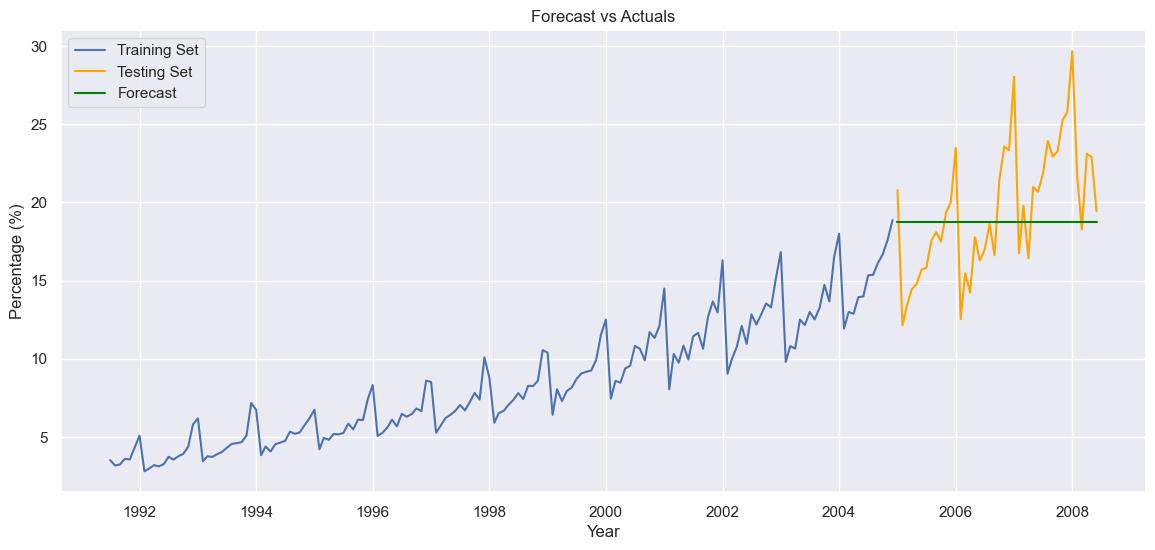

In [33]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

# fit the model with simple exponential smoothing

model = SimpleExpSmoothing(x_train['y'])
model_fit = model.fit(smoothing_level=0.9)

# Forecasting
y_pred = model_fit.forecast(len(x_test))


rmse = np.sqrt(mean_squared_error(x_test, y_pred))
print(f'RMSE: {rmse}')

# Plotting Forecast vs Actual
plt.figure(figsize=(14, 6))
plt.plot(x_train.index, x_train, label='Training Set')
plt.plot(x_test.index, x_test, label='Testing Set', color='orange')
plt.plot(x_test.index, y_pred, label='Forecast', color='green')
plt.title('Forecast vs Actuals')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend()
plt.show()


## Holts - Linear Model (Trend)
**Holt (1957)** extended simple exponential smoothing to allow the forecasting of data with a trend. This method involves a forecast equation and two smoothing equations (one for the level and one for the trend):

\begin{equation*}
ForecastEquation: \ yhat_{t+h/t} = l_{t}+h * b_{t} 
\end{equation*}
\begin{equation*}
Level Equation: \  l_{t} = \alpha * y_{t} +(1-\alpha)*(y_{t-1}+b_{t-1})
\end{equation*}
\begin{equation*}
Trend Equation: \  b_{t} = \beta ∗ (l_{t}−l_{t−1}) + (1−\beta)∗b_{t−1}
\end{equation*}


- The forecast function is no longer flat but trending. 
- The $h$-step-ahead forecast is equal to the last estimated level plus $h$-times the last estimated trend value. Hence the forecasts are a linear function of $h$.

In [35]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Holt's Linear Trend Model
holt_model = ExponentialSmoothing(x_train['y'], trend='add', seasonal=None, seasonal_periods=None)
holt_model_fit = holt_model.fit()

# Forecasting
holt_y_pred = holt_model_fit.forecast(len(x_test))

# Calculate RMSE
holt_rmse = np.sqrt(mean_squared_error(x_test, holt_y_pred))
print(f'Holt\'s Linear Model RMSE: {holt_rmse}')



Holt's Linear Model RMSE: 3.6329446750199907


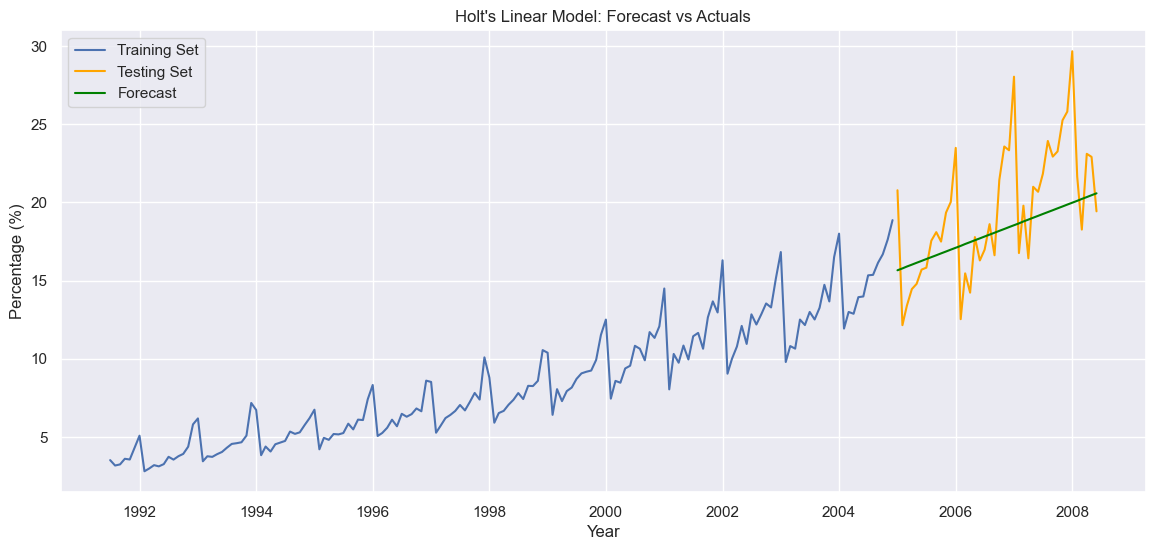

In [36]:
# Plotting Forecast vs Actual
plt.figure(figsize=(14, 6))
plt.plot(x_train.index, x_train, label='Training Set')
plt.plot(x_test.index, x_test, label='Testing Set', color='orange')
plt.plot(x_test.index, holt_y_pred, label='Forecast', color='green')
plt.title('Holt\'s Linear Model: Forecast vs Actuals')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend()
plt.show()

## Holts Winter Method
- Holt (1957) and Winters (1960) extended Holt’s method to capture seasonality. 
- The Holt-Winters seasonal method comprises the forecast equation and three smoothing equations — 
    - one for the **level** $l_{t}$ 
    - one for the **trend** $b_{t}$, and
    - one for the **seasonal** component $s_{t}$, 
 
with corresponding smoothing parameters $\alpha$, $\beta$  and $\gamma$. We use  $m$ to denote the frequency of the seasonality, i.e., the number of seasons in a year.  

For example, for quarterly data  $m$=4, and for monthly data $m$=12


## The Additive Method
- The additive method is preferred when the seasonal variations are roughly constant through the series.
- the seasonal component is expressed in absolute terms in the scale of the observed series, 
- In the level equation the series is seasonally adjusted by subtracting the seasonal component.


\[
\begin{align*}
\hat{y}_{t+h|t} &= \ell_t + hb_t + s_{t-m+h_m^+} \\
\ell_t &= \alpha (y_t - s_{t-m}) + (1 - \alpha)(\ell_{t-1} + b_{t-1}) \\
b_t &= \beta (\ell_t - \ell_{t-1}) + (1 - \beta) b_{t-1} \\
s_t &= \gamma (y_t - \ell_{t-1} - b_{t-1}) + (1 - \gamma) s_{t-m}
\end{align*}
\]

## The Multiplicative Method
- The multiplicative method is preferred when the seasonal variations are changing proportional to the level of the series.
- The seasonal component is expressed in relative terms (percentages), and the series is seasonally adjusted by dividing through by the seasonal component. 


  \[
  \begin{align*}
  \hat{y}_{t+h|t} &= (\ell_t + hb_t) s_{t-m+h_m^+} \\
  \ell_t &= \alpha \frac{y_t}{s_{t-m}} + (1 - \alpha)(\ell_{t-1} + b_{t-1}) \\
  b_t &= \beta (\ell_t - \ell_{t-1}) + (1 - \beta) b_{t-1} \\
  s_t &= \gamma \frac{y_t}{\ell_{t-1} + b_{t-1}} + (1 - \gamma) s_{t-m}
  \end{align*}
  \]


In [38]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the Holt-Winters Model
hw_model = ExponentialSmoothing(x_train['y'], trend='add', seasonal='add', seasonal_periods=12)
hw_model_fit = hw_model.fit()

# Forecasting
hw_y_pred = hw_model_fit.forecast(len(x_test))

# Calculate RMSE
hw_rmse = np.sqrt(mean_squared_error(x_test, hw_y_pred))
print(f'Holt-Winters Model RMSE: {hw_rmse}')



Holt-Winters Model RMSE: 2.2871760663367815


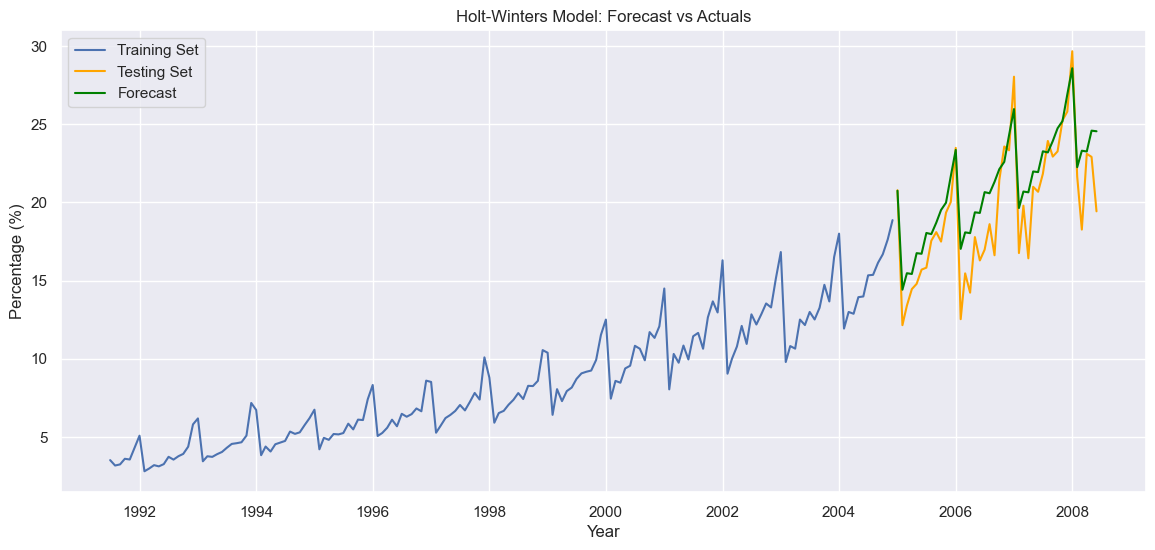

In [40]:
# Plotting Forecast vs Actual
plt.figure(figsize=(14, 6))
plt.plot(x_train.index, x_train, label='Training Set')
plt.plot(x_test.index, x_test, label='Testing Set', color='orange')
plt.plot(x_test.index, hw_y_pred, label='Forecast', color='green')
plt.title('Holt-Winters Model: Forecast vs Actuals')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend()
plt.show()

In [41]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error

# Define the parameter grid
param_grid = {
    'trend': ['add', 'mul', None],
    'seasonal': ['add', 'mul', None],
    'seasonal_periods': [6, 12, 24]
}

# Initialize variables to store the best parameters and RMSE
best_rmse = float('inf')
best_params = None

# Perform grid search
for trend in param_grid['trend']:
    for seasonal in param_grid['seasonal']:
        for seasonal_periods in param_grid['seasonal_periods']:
            try:
                model = ExponentialSmoothing(x_train['y'], trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
                model_fit = model.fit()
                y_pred = model_fit.forecast(len(x_test))
                rmse = np.sqrt(mean_squared_error(x_test, y_pred))
                if rmse < best_rmse:
                    best_rmse = rmse
                    best_params = {'trend': trend, 'seasonal': seasonal, 'seasonal_periods': seasonal_periods}
            except Exception as e:
                print(f"Error with parameters trend={trend}, seasonal={seasonal}, seasonal_periods={seasonal_periods}: {e}")

print(f'Best Parameters: {best_params}')
print(f'Best RMSE: {best_rmse}')

Best Parameters: {'trend': 'mul', 'seasonal': 'mul', 'seasonal_periods': 12}
Best RMSE: 1.494268350940858


Best Model RMSE: 1.494268350940858


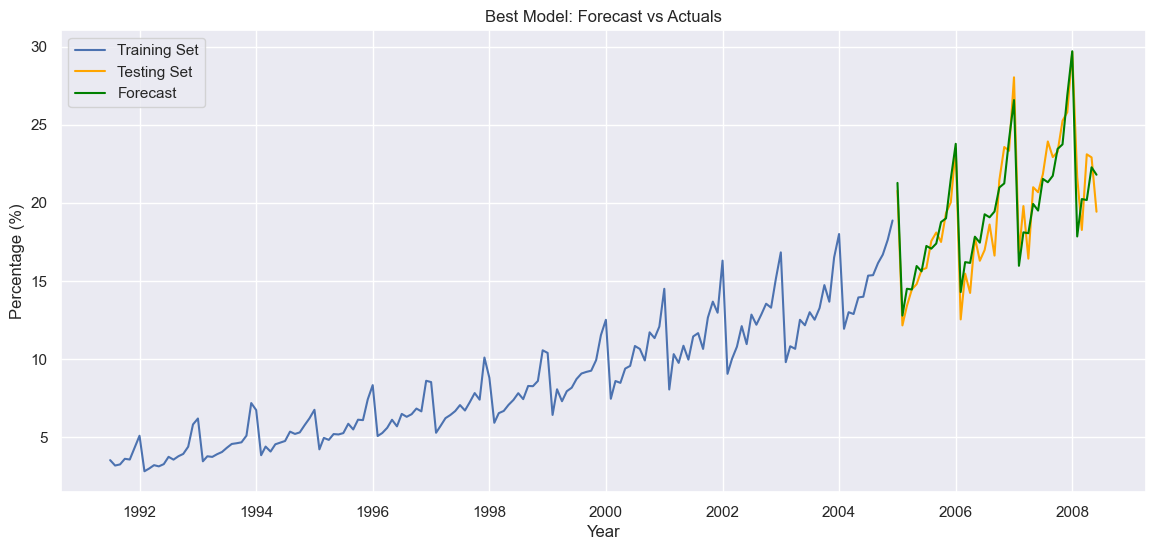

In [42]:
# Fit the model with the best parameters identified
best_model = ExponentialSmoothing(x_train['y'], trend=best_params['trend'], seasonal=best_params['seasonal'], seasonal_periods=best_params['seasonal_periods'])
best_model_fit = best_model.fit()

# Forecasting
best_y_pred = best_model_fit.forecast(len(x_test))

# Calculate RMSE
best_rmse = np.sqrt(mean_squared_error(x_test, best_y_pred))
print(f'Best Model RMSE: {best_rmse}')

# Plotting Forecast vs Actual
plt.figure(figsize=(14, 6))
plt.plot(x_train.index, x_train, label='Training Set')
plt.plot(x_test.index, x_test, label='Testing Set', color='orange')
plt.plot(x_test.index, best_y_pred, label='Forecast', color='green')
plt.title('Best Model: Forecast vs Actuals')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.legend()
plt.show()

### Insights:
- The model perfectly fits both seasonality and trend and the error dropped to 1.78, which is better than any model we have observed till now. 

## A taxmony of Exponential Smoothing methods
- By considering variations in the combinations of the trend and seasonal components, nine exponential smoothing methods are possible
- Damped trend is nothing but exponential growth or decline
- In addition too these main-stream 9 equations there might be some time-series trend taking some higher-order polynomial functions.

### 9 Exponential smoothing methods
<img src="images/9_exp.png">





## Thank You